In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
pd.options.display.float_format = "{:.1f}".format

In [ ]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df["median_house_value"] /=1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [ ]:

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [ ]:
def build_model(my_learning_rate):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [ ]:
def train_model(model,df,feature,label,epochs,batch_size):
  history=model.fit(x=df[feature],y=df[label],batch_size=batch_size,epochs=epochs)

  trained_weight=model.get_weights()[0]
  trained_bias=model.get_weights()[1]
  epochs=history.epoch

  hist=pd.DataFrame(history.history)
  rmse=hist["root_mean_squared_error"]
  return trained_weight,trained_bias,epochs,rmse

In [ ]:
def plot_the_model(trained_weight,trained_bias,feature,label):
  plt.xlabel(feature)
  plt.ylabel("label")
  random_examples=training_df.sample(n=200)
  plt.scatter(random_examples[feature],random_examples[label])

  x0=0
  y0=trained_bias
  x1=10000
  y1=trained_bias+trained_weight*x1
  plt.plot([x0,x1],[y0,y1],c="r")
  plt.show()

In [ ]:
def plot_the_loss_curve(epochs,rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs,rmse,label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97,rmse.max()])
  plt.show()

Epoch 1/30
567/567 [==============================] - 0s 771us/step - loss: 1216706.5000 - root_mean_squared_error: 1103.0442
Epoch 2/30
567/567 [==============================] - 0s 731us/step - loss: 28297.9258 - root_mean_squared_error: 168.2199
Epoch 3/30
567/567 [==============================] - 0s 729us/step - loss: 27415.7480 - root_mean_squared_error: 165.5770
Epoch 4/30
567/567 [==============================] - 0s 746us/step - loss: 26726.6562 - root_mean_squared_error: 163.4829
Epoch 5/30
567/567 [==============================] - 0s 741us/step - loss: 25893.3340 - root_mean_squared_error: 160.9141
Epoch 6/30
567/567 [==============================] - 0s 805us/step - loss: 25195.7285 - root_mean_squared_error: 158.7316
Epoch 7/30
567/567 [==============================] - 0s 861us/step - loss: 24580.1738 - root_mean_squared_error: 156.7807
Epoch 8/30
567/567 [==============================] - 0s 839us/step - loss: 23995.3203 - root_mean_squared_error: 154.9042
Epoch 9/30
56

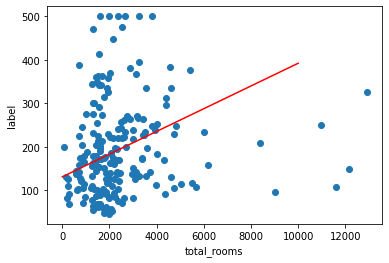

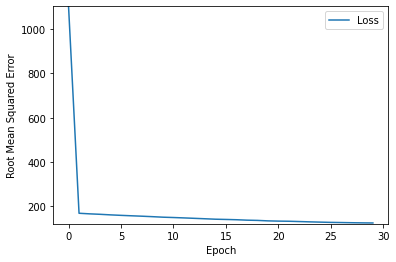

In [ ]:
learning_rate=0.01
epochs=30
batch_size=30

my_feature="total_rooms"
my_label="median_house_value"

my_model=None
my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Using the model to make predictions

In [ ]:
def predict_house_values(n,feature,label):
  batch=training_df[feature][10000:10000+n]
  predicted_values=my_model.predict_on_batch(x=batch)

  print("feature label        predicted")
  print("value   value        value")
  print("        in thousand$ in thousand$")
  print("----------------------------------")
  for i in range(n):
    print("%5.0f %6.0f %15.0f"%(training_df[feature][10000+i],training_df[label][1000+i],predicted_values[i][0]))    

In [ ]:
predict_house_values(10,my_feature,my_label)

feature label        predicted
value   value        value
        in thousand$ in thousand$
----------------------------------
 1960    169             182
 3400    184             220
 3677    161             227
 2202    160             188
 2403    275             194
 5652    261             279
 3318     86             218
 2552    168             197
 1364    184             166
 3468    180             221


In [ ]:
# Most of the predicted values differ significantly
# from the label value, so the trained model probably 
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of 
# the rest of the examples.  

# Hence changing the feature to be used

Epoch 1/18
5667/5667 [==============================] - 5s 811us/step - loss: 42608.8555 - root_mean_squared_error: 206.4191
Epoch 2/18
5667/5667 [==============================] - 5s 821us/step - loss: 26763.6094 - root_mean_squared_error: 163.5959
Epoch 3/18
5667/5667 [==============================] - 5s 843us/step - loss: 27374.3809 - root_mean_squared_error: 165.4521
Epoch 4/18
5667/5667 [==============================] - 5s 833us/step - loss: 26799.8594 - root_mean_squared_error: 163.7066
Epoch 5/18
5667/5667 [==============================] - 5s 831us/step - loss: 26832.6484 - root_mean_squared_error: 163.8067
Epoch 6/18
5667/5667 [==============================] - 5s 841us/step - loss: 27349.7402 - root_mean_squared_error: 165.3776
Epoch 7/18
5667/5667 [==============================] - 5s 815us/step - loss: 27282.4355 - root_mean_squared_error: 165.1740
Epoch 8/18
5667/5667 [==============================] - 5s 823us/step - loss: 25990.2656 - root_mean_squared_error: 161.2150


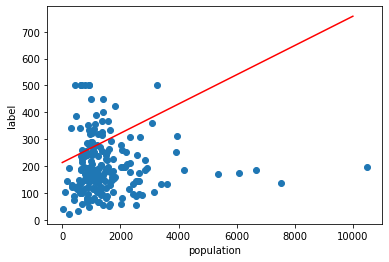

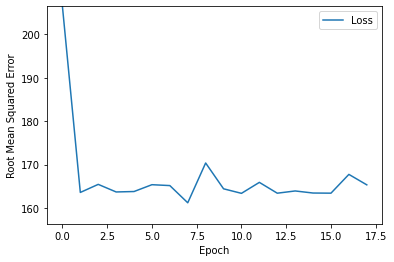

feature label        predicted
value   value        value
        in thousand$ in thousand$
----------------------------------
 1286    169             284
 1867    184             315
 2191    161             333
 1052    160             271
 1647    275             303
 2312    261             339
 1604     86             301
 1066    168             272
  338    184             232
 1604    180             301


In [ ]:
my_feature="population"
my_label="median_house_value"
learning_rate = 0.1
epochs = 18
batch_size = 3

my_model=None
my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

predict_house_values(10,my_feature,my_label)

Defining a synthetic feature

the ratio of total_rooms to population might have some predictive power

Epoch 1/30
567/567 [==============================] - 0s 809us/step - loss: 39607.4336 - root_mean_squared_error: 199.0162
Epoch 2/30
567/567 [==============================] - 0s 835us/step - loss: 21265.9941 - root_mean_squared_error: 145.8286
Epoch 3/30
567/567 [==============================] - 0s 819us/step - loss: 15626.5283 - root_mean_squared_error: 125.0061
Epoch 4/30
567/567 [==============================] - 0s 837us/step - loss: 14953.6074 - root_mean_squared_error: 122.2849
Epoch 5/30
567/567 [==============================] - 0s 841us/step - loss: 14841.0518 - root_mean_squared_error: 121.8239
Epoch 6/30
567/567 [==============================] - 1s 920us/step - loss: 14738.8203 - root_mean_squared_error: 121.4035
Epoch 7/30
567/567 [==============================] - 0s 797us/step - loss: 14626.0811 - root_mean_squared_error: 120.9383
Epoch 8/30
567/567 [==============================] - 0s 831us/step - loss: 14470.5010 - root_mean_squared_error: 120.2934
Epoch 9/30
567/5

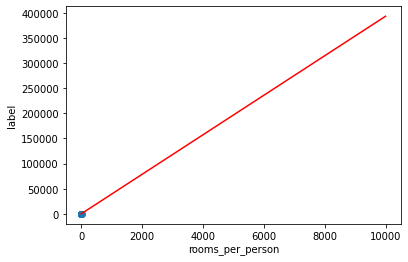

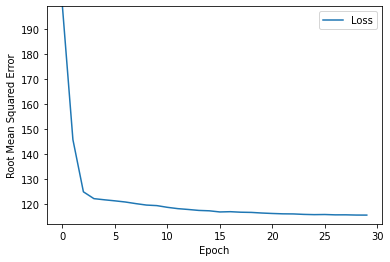

feature label        predicted
value   value        value
        in thousand$ in thousand$
----------------------------------
    2    169             188
    2    184             199
    2    161             194
    2    160             210
    1    275             185
    2    261             224
    2     86             209
    2    168             222
    4    184             286
    2    180             213


In [ ]:
training_df["rooms_per_person"]=training_df["total_rooms"]/training_df["population"]
my_feature="rooms_per_person"

learning_rate = 0.05
epochs = 30
batch_size = 30

my_model=None
my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

predict_house_values(10,my_feature,my_label)

Find feature(s) whose raw values correlate with the label

A correlation matrix indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
0.0: no correlation; the two column's are not linearly related.
In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

In [ ]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic feature) and one label (median_house_value). A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.